In [4]:
#csvファイルを読み込む
import pandas as pd

# ファイルパス（適宜変更してください）
file_path = "America_historical_energy_use.csv"

# 読み込み
df = pd.read_csv(file_path)

# 先頭5行を確認
print(df.head())

# データの概要
print(df.info())



   Year  Coal  Natural Gas  Petroleum  Nuclear Electric Power  \
0  1635   NaN          NaN        NaN                     NaN   
1  1645   NaN          NaN        NaN                     NaN   
2  1655   NaN          NaN        NaN                     NaN   
3  1665   NaN          NaN        NaN                     NaN   
4  1675   NaN          NaN        NaN                     NaN   

   Hydroelectric Power   Wood  
0                  NaN    NaN  
1                  NaN  0.001  
2                  NaN  0.002  
3                  NaN  0.005  
4                  NaN  0.007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    94 non-null     int64  
 1   Coal                    72 non-null     float64
 2   Natural Gas             65 non-null     float64
 3   Petroleum               70 non-null     float

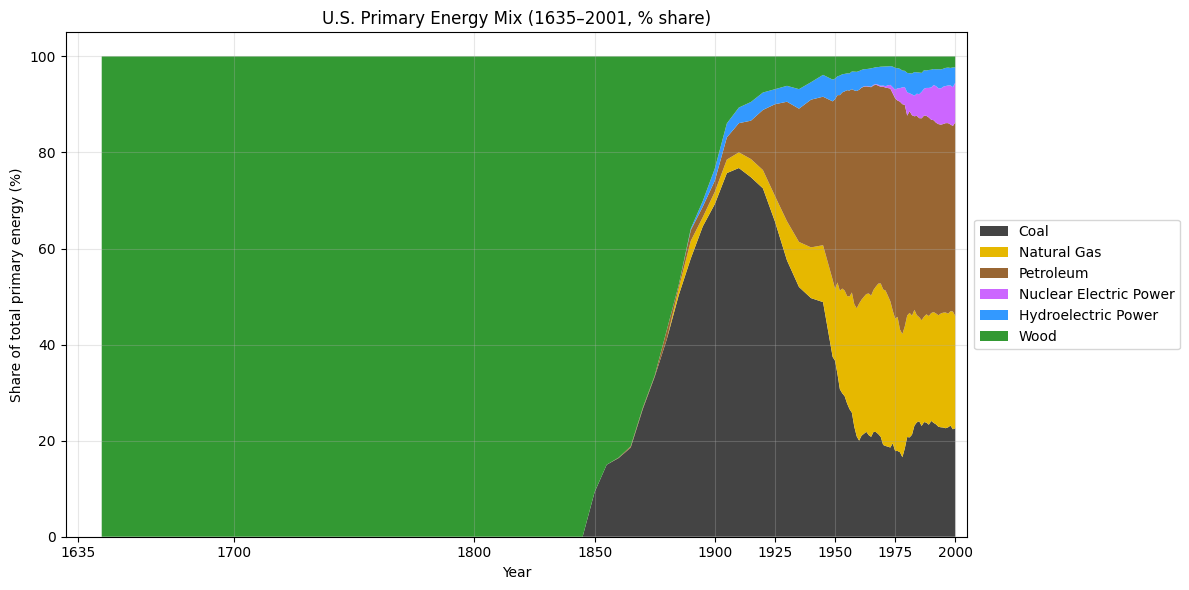

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === CSVの読み込み ===
file_path = "America_historical_energy_use.csv"
df = pd.read_csv(file_path)

# === データ前処理 ===
# 数値列だけを抽出
energy_cols = ['Coal', 'Natural Gas', 'Petroleum', 'Nuclear Electric Power', 'Hydroelectric Power', 'Wood']
df = df[['Year'] + energy_cols]

# 年が昇順に並んでいなければ並べ替え
df = df.sort_values('Year')

# NaNを0に置き換え（存在しないエネルギー源は0）
df[energy_cols] = df[energy_cols].fillna(0)

# === 割合（%）に変換 ===
df_sum = df[energy_cols].sum(axis=1)
share = df[energy_cols].div(df_sum, axis=0) * 100

# === カラーパレット設定（2枚目の例に近い雰囲気） ===
colors = {
    'Coal': '#444444',              # ダークグレー（石炭）
    'Petroleum': '#996633',         # 茶色（石油）
    'Natural Gas': '#e6b800',       # 黄色（天然ガス）
    'Hydroelectric Power': '#3399ff', # 水色（水力）
    'Nuclear Electric Power': '#cc66ff', # 紫（原子力）
    'Wood': '#339933'               # 緑（バイオマス）
}

# === プロット ===
plt.figure(figsize=(12,6))

plt.stackplot(df['Year'],
              *[share[c] for c in energy_cols],
              labels=energy_cols,
              colors=[colors[c] for c in energy_cols])

plt.xlabel('Year')
plt.ylabel('Share of total primary energy (%)')
plt.title('U.S. Primary Energy Mix (1635–2001, % share)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(alpha=0.3)

# === 年代軸のスケールを調整 ===
# 初期（1600–1850）は間隔が疎、近代（1900以降）は密
major_ticks = [1635, 1700, 1800, 1850, 1900, 1925, 1950, 1975, 2000]
plt.xticks(major_ticks)
plt.xlim(1630, 2005)

plt.tight_layout()
plt.show()


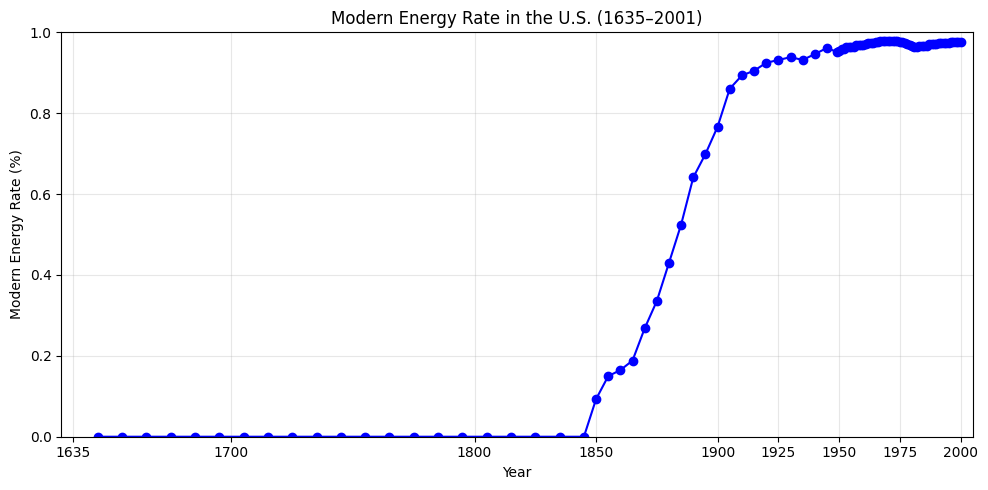

In [6]:
#modern energy rateを算出
modern_energy_cols = ['Coal', 'Natural Gas', 'Petroleum', 'Nuclear Electric Power', 'Hydroelectric Power']
rate_modern_energy = df[modern_energy_cols].sum(axis=1) / df[energy_cols].sum(axis=1)
df['Modern Energy Rate (%)'] = rate_modern_energy
# === modern energy rateのプロット ===
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Modern Energy Rate (%)'], color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Modern Energy Rate (%)')
plt.title('Modern Energy Rate in the U.S. (1635–2001)')
plt.grid(alpha=0.3)
plt.xlim(1630, 2005)
plt.ylim(0, 1)
plt.xticks(major_ticks)
plt.tight_layout()
plt.show()

#df['Modern Energy Rate (%)'] これを、npyとして保存,年代の情報も保持させる
np.save('America_modern_energy_rate.npy', df[['Year', 'Modern Energy Rate (%)']].values)

In [7]:
modern_energy_rate = np.load('America_modern_energy_rate.npy')
print(modern_energy_rate)

[[1.63500000e+03            nan]
 [1.64500000e+03 0.00000000e+00]
 [1.65500000e+03 0.00000000e+00]
 [1.66500000e+03 0.00000000e+00]
 [1.67500000e+03 0.00000000e+00]
 [1.68500000e+03 0.00000000e+00]
 [1.69500000e+03 0.00000000e+00]
 [1.70500000e+03 0.00000000e+00]
 [1.71500000e+03 0.00000000e+00]
 [1.72500000e+03 0.00000000e+00]
 [1.73500000e+03 0.00000000e+00]
 [1.74500000e+03 0.00000000e+00]
 [1.75500000e+03 0.00000000e+00]
 [1.76500000e+03 0.00000000e+00]
 [1.77500000e+03 0.00000000e+00]
 [1.78500000e+03 0.00000000e+00]
 [1.79500000e+03 0.00000000e+00]
 [1.80500000e+03 0.00000000e+00]
 [1.81500000e+03 0.00000000e+00]
 [1.82500000e+03 0.00000000e+00]
 [1.83500000e+03 0.00000000e+00]
 [1.84500000e+03 0.00000000e+00]
 [1.85000000e+03 9.29147221e-02]
 [1.85500000e+03 1.49822064e-01]
 [1.86000000e+03 1.64769133e-01]
 [1.86500000e+03 1.88325022e-01]
 [1.87000000e+03 2.67965587e-01]
 [1.87500000e+03 3.35646542e-01]
 [1.88000000e+03 4.29914017e-01]
 [1.88500000e+03 5.24712135e-01]
 [1.890000

# However zeros in the beginning and uneven data samples influence fitting so delete and adjust them

=== Fitted parameters (±95% CI) ===
a = 0.971692  (SE=0.00406, 95% CI [0.963368, 0.980016])
b = 11.9128  (SE=0.746, 95% CI [10.3842, 13.4415])
c = 0.0768325  (SE=0.00189, 95% CI [0.072953, 0.0807121])

=== Parameter covariance matrix (pcov) ===
[[ 1.65134961e-05 -6.66715155e-04 -3.27764920e-06]
 [-6.66715155e-04  5.56886522e-01  1.27788599e-03]
 [-3.27764920e-06  1.27788599e-03  3.58693749e-06]]

=== Parameter correlation matrix ===
[[ 1.         -0.21985556 -0.42587393]
 [-0.21985556  1.          0.90416325]
 [-0.42587393  0.90416325  1.        ]]


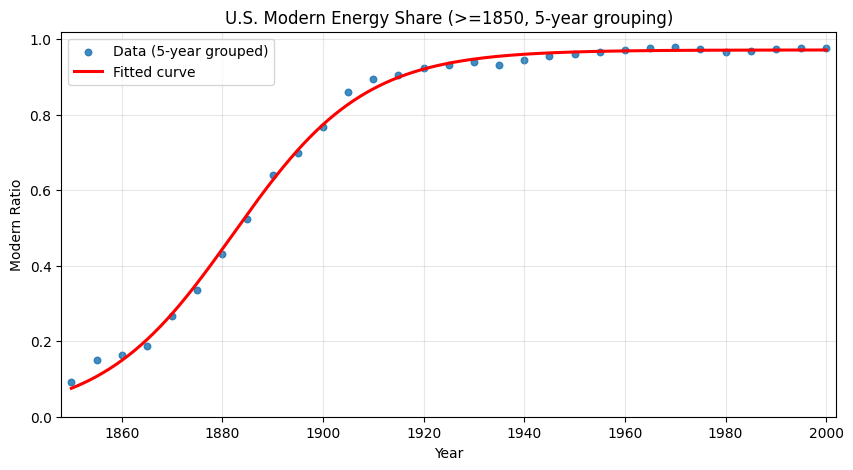

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

NPY_PATH = "America_modern_energy_rate.npy"
START_YEAR = 1850
EPS_LOW, EPS_HIGH = 1e-4, 1-1e-4
ALPHA = 0.05

# あなたの関数形（a/(1 + b*exp(-c*(x-x0)))）
def model_func(x, a, b, c):
    x = np.asarray(x, dtype=float)
    x0 = x.min()  # 数値安定化のため最小年基準
    return a / (1.0 + b * np.exp(-c * (x - x0)))

# --- 1) データ読み込み・整形 ---
arr = np.load(NPY_PATH)              # [[year, value], ...]
years = arr[:, 0].astype(float)
vals  = arr[:, 1].astype(float)

mask = (years >= START_YEAR) & (~np.isnan(vals))
years = years[mask]
vals  = vals[mask]

if np.nanmax(vals) > 1.01:  # %なら0-1に
    vals = vals / 100.0
vals = np.clip(vals, EPS_LOW, EPS_HIGH)

# 5年ビン平均（密度バイアスを低減）
bins = (years // 5).astype(int) * 5
uniq_bins = np.unique(bins)
x5 = uniq_bins.astype(float)
y5 = np.array([np.mean(vals[bins == b]) for b in uniq_bins], dtype=float)

# --- 2) フィット ---
p0 = [min(1.0, max(y5) * 1.02), 1.0, 0.03]          # 初期値
bounds = ([0.0, 0.0, 1e-4], [1.0, 1e6, 1.0])

# maxfev は「粘り強さ」の上限：収束が早ければ小さくても可
popt, pcov = curve_fit(
    model_func, x5, y5, p0=p0, bounds=bounds, maxfev=200000
)
a, b, c = popt
perr = np.sqrt(np.diag(pcov))

# 相関行列
with np.errstate(divide='ignore', invalid='ignore'):
    corr = pcov / np.outer(perr, perr)

# 95% CI（パラメータのみ）
dof = max(len(x5) - len(popt), 1)
tval = t.ppf(1 - ALPHA/2, dof)

print("=== Fitted parameters (±95% CI) ===")
for name, val, se in zip(['a','b','c'], popt, perr):
    print(f"{name} = {val:.6g}  (SE={se:.3g}, 95% CI [{val - tval*se:.6g}, {val + tval*se:.6g}])")

print("\n=== Parameter covariance matrix (pcov) ===")
print(pcov)

print("\n=== Parameter correlation matrix ===")
print(corr)

# --- 3) 可視化（信頼帯なし） ---
t_grid = np.linspace(x5.min(), x5.max(), 600)
yhat = model_func(t_grid, *popt)

plt.figure(figsize=(10,5))
plt.scatter(x5, y5, s=22, label="Data (5-year grouped)", alpha=0.85)
plt.plot(t_grid, yhat, "r-", lw=2.2, label="Fitted curve")
plt.xlim(x5.min()-2, x5.max()+2)
plt.ylim(0, 1.02)
plt.xlabel("Year")
plt.ylabel("Modern Ratio")
plt.title("U.S. Modern Energy Share (>=1850, 5-year grouping)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()



===== Full period fit =====
=== Fitted parameters (±95% CI) ===
a = 0.971692  (SE=0.00406, 95% CI [0.963368, 0.980016])
b = 11.9128  (SE=0.746, 95% CI [10.3842, 13.4415])
c = 0.0768325  (SE=0.00189, 95% CI [0.072953, 0.0807121])

=== Parameter covariance matrix (pcov) ===
[[ 1.65134961e-05 -6.66715155e-04 -3.27764920e-06]
 [-6.66715155e-04  5.56886522e-01  1.27788599e-03]
 [-3.27764920e-06  1.27788599e-03  3.58693749e-06]]

=== Parameter correlation matrix ===
[[ 1.         -0.21985556 -0.42587393]
 [-0.21985556  1.          0.90416325]
 [-0.42587393  0.90416325  1.        ]]

===== Truncated fit (Year < 1940) =====
=== Fitted parameters (±95% CI) ===
a = 0.972467  (SE=0.0129, 95% CI [0.945054, 0.99988])
b = 11.9479  (SE=1.04, 95% CI [9.73081, 14.165])
c = 0.0768676  (SE=0.00316, 95% CI [0.0701389, 0.0835962])

=== Parameter covariance matrix (pcov) ===
[[ 1.65411794e-04 -5.11940964e-03 -2.83690596e-05]
 [-5.11940964e-03  1.08199552e+00  2.87261247e-03]
 [-2.83690596e-05  2.87261247e-

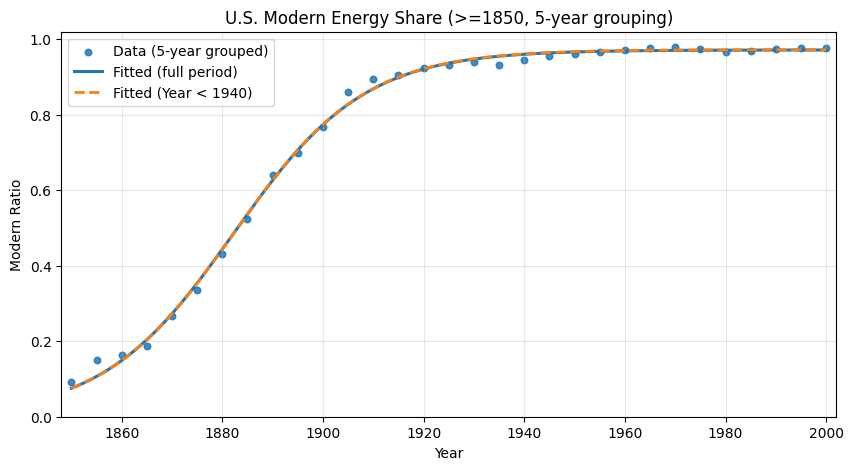

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

NPY_PATH = "America_modern_energy_rate.npy"
START_YEAR = 1850
CUTOFF_YEAR = 1940          # ← ここより後を「切る」年
EPS_LOW, EPS_HIGH = 1e-4, 1-1e-4
ALPHA = 0.05

# あなたの関数形（a/(1 + b*exp(-c*(x-x0)))）
def model_func(x, a, b, c):
    x = np.asarray(x, dtype=float)
    x0 = x.min()  # 数値安定化のため最小年基準
    return a / (1.0 + b * np.exp(-c * (x - x0)))

# ---- 1) データ読み込み・整形 ----
arr = np.load(NPY_PATH)              # [[year, value], ...]
years = arr[:, 0].astype(float)
vals  = arr[:, 1].astype(float)

mask = (years >= START_YEAR) & (~np.isnan(vals))
years = years[mask]
vals  = vals[mask]

if np.nanmax(vals) > 1.01:  # %なら0-1に
    vals = vals / 100.0
vals = np.clip(vals, EPS_LOW, EPS_HIGH)

# 5年ビン平均（密度バイアスを低減）
bins = (years // 5).astype(int) * 5
uniq_bins = np.unique(bins)
x5 = uniq_bins.astype(float)
y5 = np.array([np.mean(vals[bins == b]) for b in uniq_bins], dtype=float)

# ---- 2) フィット用の関数 ----
def fit_and_report(label, x, y):
    print(f"\n===== {label} =====")

    # 初期値・制約
    p0 = [min(1.0, max(y) * 1.02), 1.0, 0.03]
    bounds = ([0.0, 0.0, 1e-4], [1.0, 1e6, 1.0])

    popt, pcov = curve_fit(
        model_func, x, y, p0=p0, bounds=bounds, maxfev=200000
    )
    a, b, c = popt
    perr = np.sqrt(np.diag(pcov))

    # 相関行列
    with np.errstate(divide='ignore', invalid='ignore'):
        corr = pcov / np.outer(perr, perr)

    # 95% CI
    dof = max(len(x) - len(popt), 1)
    tval = t.ppf(1 - ALPHA/2, dof)

    print("=== Fitted parameters (±95% CI) ===")
    for name, val, se in zip(['a','b','c'], popt, perr):
        ci_low  = val - tval * se
        ci_high = val + tval * se
        print(f"{name} = {val:.6g}  (SE={se:.3g}, 95% CI [{ci_low:.6g}, {ci_high:.6g}])")

    print("\n=== Parameter covariance matrix (pcov) ===")
    print(pcov)

    print("\n=== Parameter correlation matrix ===")
    print(corr)

    return popt

# ---- 3) 2パターンでフィット ----

# (A) 全期間
popt_full = fit_and_report("Full period fit", x5, y5)

# (B) 1940年未満だけ（飽和期を除いてフィット）
mask_trunc = x5 < CUTOFF_YEAR
x5_trunc = x5[mask_trunc]
y5_trunc = y5[mask_trunc]
popt_trunc = fit_and_report(f"Truncated fit (Year < {CUTOFF_YEAR})", x5_trunc, y5_trunc)

# ---- 4) 可視化 ----
t_grid = np.linspace(x5.min(), x5.max(), 600)
yhat_full  = model_func(t_grid, *popt_full)
yhat_trunc = model_func(t_grid, *popt_trunc)

plt.figure(figsize=(10,5))
plt.scatter(x5, y5, s=22, label="Data (5-year grouped)", alpha=0.85)

plt.plot(t_grid, yhat_full,  "-", lw=2.2, label="Fitted (full period)")
plt.plot(t_grid, yhat_trunc, "--", lw=2.0, label=f"Fitted (Year < {CUTOFF_YEAR})")

plt.xlim(x5.min()-2, x5.max()+2)
plt.ylim(0, 1.02)
plt.xlabel("Year")
plt.ylabel("Modern Ratio")
plt.title("U.S. Modern Energy Share (>=1850, 5-year grouping)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


Normalization reference year: 1973.0 (max ratio=0.980)
Data used for fitting: 1845–1973

=== Fitted parameters ===
a=0.989571, b=18.592817, c=0.078454
→ k=0.078454, x*=1882.25


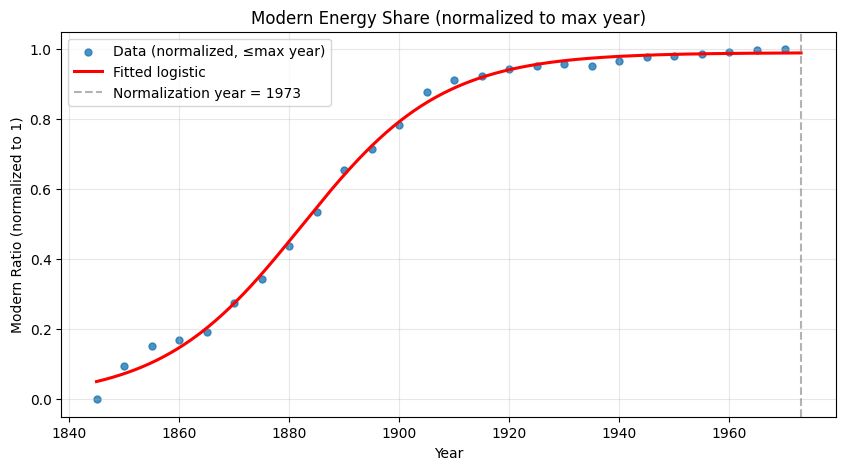

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

NPY_PATH = "America_modern_energy_rate.npy"
START_YEAR = 1845
EPS_LOW, EPS_HIGH = 1e-4, 1-1e-4
ALPHA = 0.05

def model_func(x, a, b, c):
    x = np.asarray(x, dtype=float)
    x0 = x.min()
    return a / (1.0 + b * np.exp(-c * (x - x0)))

# --- 1) データ読み込み ---
arr = np.load(NPY_PATH)              # [[year, value], ...]
years = arr[:, 0].astype(float)
vals  = arr[:, 1].astype(float)

mask = (years >= START_YEAR) & (~np.isnan(vals))
years = years[mask]
vals  = vals[mask]

if np.nanmax(vals) > 1.01:  # %なら0-1へ
    vals = vals / 100.0

# --- 2) 正規化対象の上限年を自動検出 ---
imax = np.nanargmax(vals)
year_max = years[imax]
val_max = vals[imax]

# その年以前のデータを抽出（上昇期のみ）
mask_growth = years <= year_max
years_growth = years[mask_growth]
vals_growth = vals[mask_growth]

# 最大値で正規化 → 最終的に max = 1.0
vals_norm = vals_growth / val_max
vals_norm = np.clip(vals_norm, EPS_LOW, EPS_HIGH)

print(f"Normalization reference year: {year_max} (max ratio={val_max:.3f})")
print(f"Data used for fitting: {years_growth.min():.0f}–{years_growth.max():.0f}")

# --- 3) 5年ビン平均 ---
bins = (years_growth // 5).astype(int) * 5
uniq_bins = np.unique(bins)
x5 = uniq_bins.astype(float)
y5 = np.array([np.mean(vals_norm[bins == b]) for b in uniq_bins], dtype=float)

# --- 4) フィット ---
p0 = [1.0, 1.0, 0.03]                 # 正規化済なのでa≈1固定でもよい
bounds = ([0.5, 0.0, 1e-4], [1.2, 1e6, 1.0])

popt, pcov = curve_fit(model_func, x5, y5, p0=p0, bounds=bounds, maxfev=200000)
a, b, c = popt
perr = np.sqrt(np.diag(pcov))

# --- 5) 標準形のパラメータ変換 ---
x0 = x5.min()
lnb = np.log(b)
k = c
x_star = x0 + lnb / c

print("\n=== Fitted parameters ===")
print(f"a={a:.6f}, b={b:.6f}, c={c:.6f}")
print(f"→ k={k:.6f}, x*={x_star:.2f}")

# --- 6) プロット ---
t_grid = np.linspace(x5.min(), year_max, 600)
yhat = model_func(t_grid, *popt)

plt.figure(figsize=(10,5))
plt.scatter(x5, y5, s=25, alpha=0.8, label="Data (normalized, ≤max year)")
plt.plot(t_grid, yhat, "r-", lw=2.2, label="Fitted logistic")
plt.axvline(x=year_max, color='gray', linestyle='--', alpha=0.6,
            label=f"Normalization year = {year_max:.0f}")
plt.xlabel("Year")
plt.ylabel("Modern Ratio (normalized to 1)")
plt.title("Modern Energy Share (normalized to max year)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()
#定義、Woodのみがtraditional energy